Usage:
* Choose labels to summarize
* Choose data to load
* Run everything

In [4]:
!pip install tabulate
#%matplotlib notebook

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [12]:
!pip install seglearn

  Using cached seglearn-1.2.5-py3-none-any.whl.metadata (5.6 kB)
  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached seglearn-1.2.5-py3-none-any.whl (11.3 MB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl (41.0 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   -------- ------------------------------- 1/5 [scipy]
   -------- ------------------------------- 1/5 [scipy]
   -------- ------------------------------- 1/5 [scipy]
   -------- ------------------------------- 1/5 [scipy]
   -------- ------------------------------- 1/5 [scipy]
   -------- ------------------------------- 1/5 [scipy]
   -------- -----------

In [9]:
# --- third-party ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tabulate
import os
# --- own ---
os.chdir(r"E:\MS_AI\Sem-IV\Seminar-ADLTS\tool-tracking\data-tools")
from datatools import MeasurementDataReader, MeasurementSeries, Measurement, DataTypes, to_ts_data
from datatools import ACC, GYR, MAG
os.chdir(r"E:\MS_AI\Sem-IV\Seminar-ADLTS\tool-tracking\fhg-utils")
from fhgutils import contextual_recarray_dtype

In [10]:
# Load all data
os.chdir(r"E:\MS_AI\Sem-IV\Seminar-ADLTS\tool-tracking")
mdr = MeasurementDataReader(source = "./tool-tracking-data/")
data = mdr.query().filter_by(
    MeasurementSeries == ['pythagoras-07-20200724'],  # RIVETER
    DataTypes == [ACC, GYR, MAG]
).get()

Xt, Xc, y = to_ts_data(data, contextual_recarray_dtype)

[INFO] Preparing data from:
  tool-tracking-data\pneumatic_rivet_gun\pythagoras-07-20200724
  tool-tracking-data\pneumatic_rivet_gun\pythagoras-07-20200724
  tool-tracking-data\pneumatic_rivet_gun\pythagoras-07-20200724
  tool-tracking-data\pneumatic_rivet_gun\pythagoras-07-20200724


[INFO] Read annotation: 100%|██████████| 16/16 [00:00<00:00, 21.50it/s, file=data-04.annotation]

[INFO] Finished with 4 measurement(s).


In [11]:
duration_arr = None
for i in range(0,3):
    # For each measurement, calculate the duration of each window
    data = np.array(Xt[i])
    t_diff = np.diff(data[:, 0])  # conversion from ms to s?
    t_diff = np.insert(t_diff, 0, 0)  # first diff is zero
    yt = np.array(y[i])
    # duration is the summed diffs of timestamps of consecutive, equal y's
    current_y = -1
    duration = 0
    for i in range(len(yt)):
        previous_y = current_y
        current_y = yt[i]
        if current_y == previous_y:
            duration += t_diff[i]
        else:  # add to our duration array
            if duration_arr is None:
                duration_arr = np.array([[current_y, duration]])
            else:
                duration_arr = np.append(duration_arr, np.array([[previous_y, duration]]), axis=0)
            duration = 0
            previous_y = current_y
duration_df = pd.DataFrame(duration_arr, columns=["y", "duration [s]"])

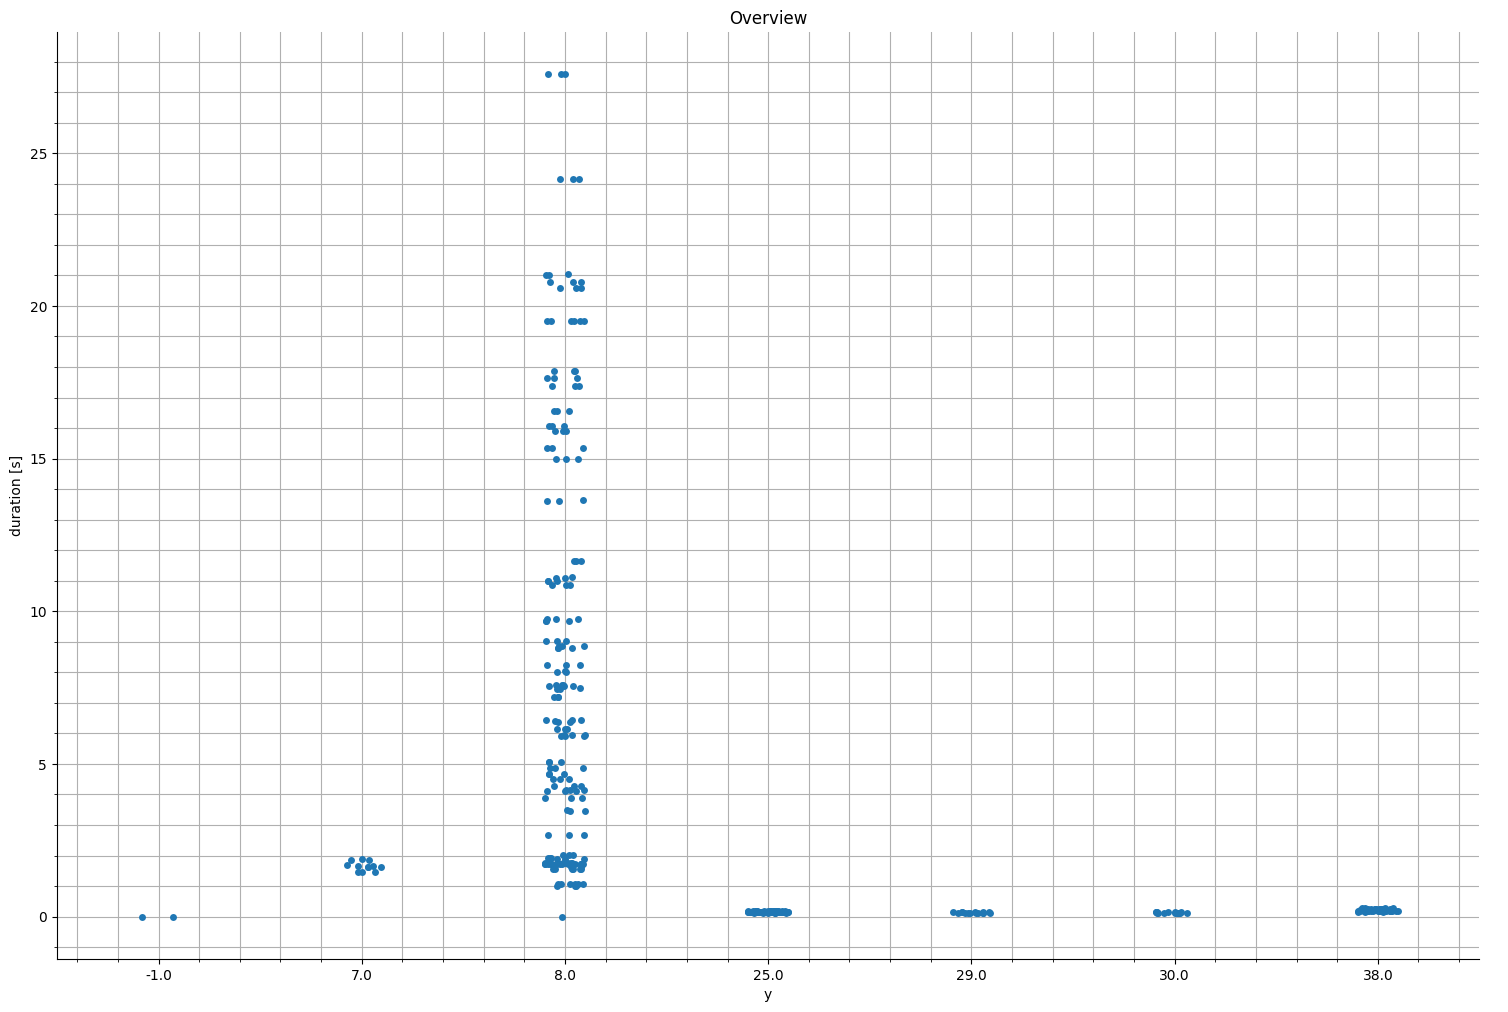

In [12]:
# Categorical scatterplot
g = sns.catplot(x="y", y="duration [s]", data=duration_df, height=10, aspect=1.5)
# Access the underlying axes
ax = g.ax  # Get the single Axes object, as catplot returns a FacetGrid
# Enable minor ticks
ax.minorticks_on()
# Set grid for both major and minor ticks
ax.grid(True, which='both')
# Set the title
ax.set_title("Overview")
plt.show()



Overview:


C:\Users\Akash\AppData\Local\Temp\ipykernel_29712\3349418975.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(duration_df_uniq)
c:\Users\Akash\anaconda3\envs\tool_tracking_env\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Akash\AppData\Local\Temp\ipykernel_29712\3349418975.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fl

  Label       Min        Max      Mean    Median        Std    90% Percentile    95% Percentile
-------  --------  ---------  --------  --------  ---------  ----------------  ----------------
     -1  0          0         0         0         0                  0                 0
      7  1.46642    1.87138   1.65912   1.65217   0.149311           1.86724           1.8691
      8  0         27.5932    8.5607    6.43368   6.82749           19.5131           20.7939
     25  0.107537   0.195522  0.156775  0.154873  0.0200678          0.193591          0.195522
     29  0.107537   0.156418  0.130354  0.117313  0.0218693          0.156418          0.156418
     30  0.107538   0.154873  0.126013  0.117313  0.0201475          0.15158           0.154873
     38  0.146642   0.273731  0.213271  0.210186  0.0324869          0.263955          0.271028


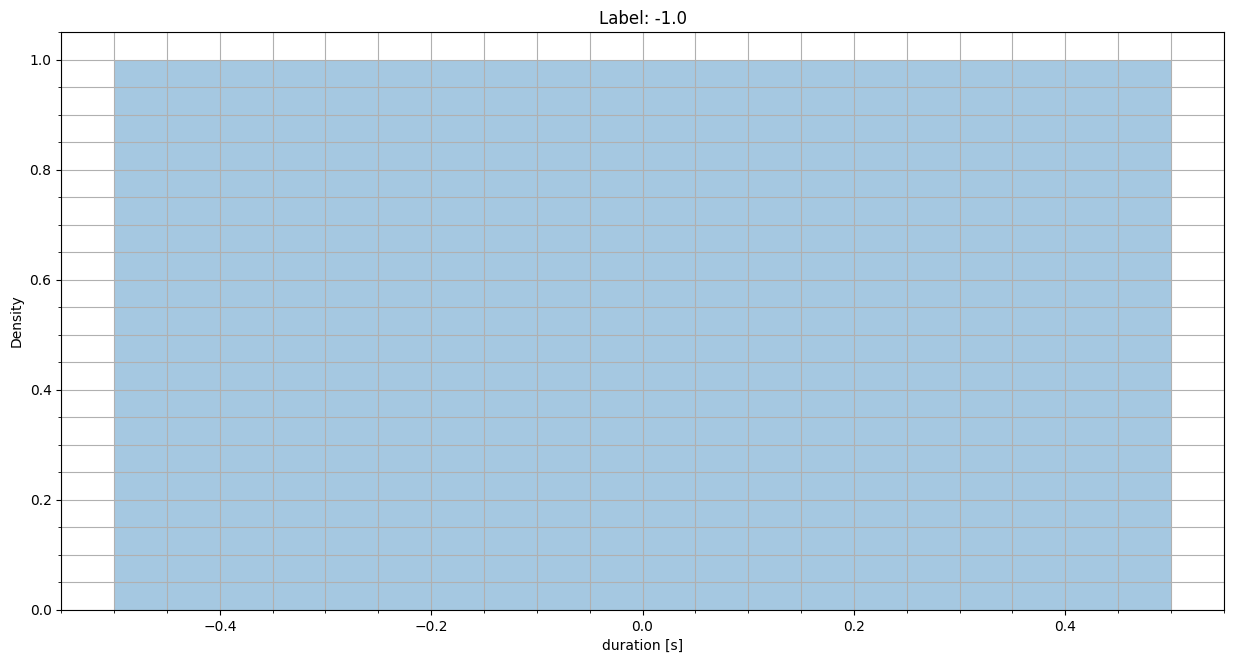

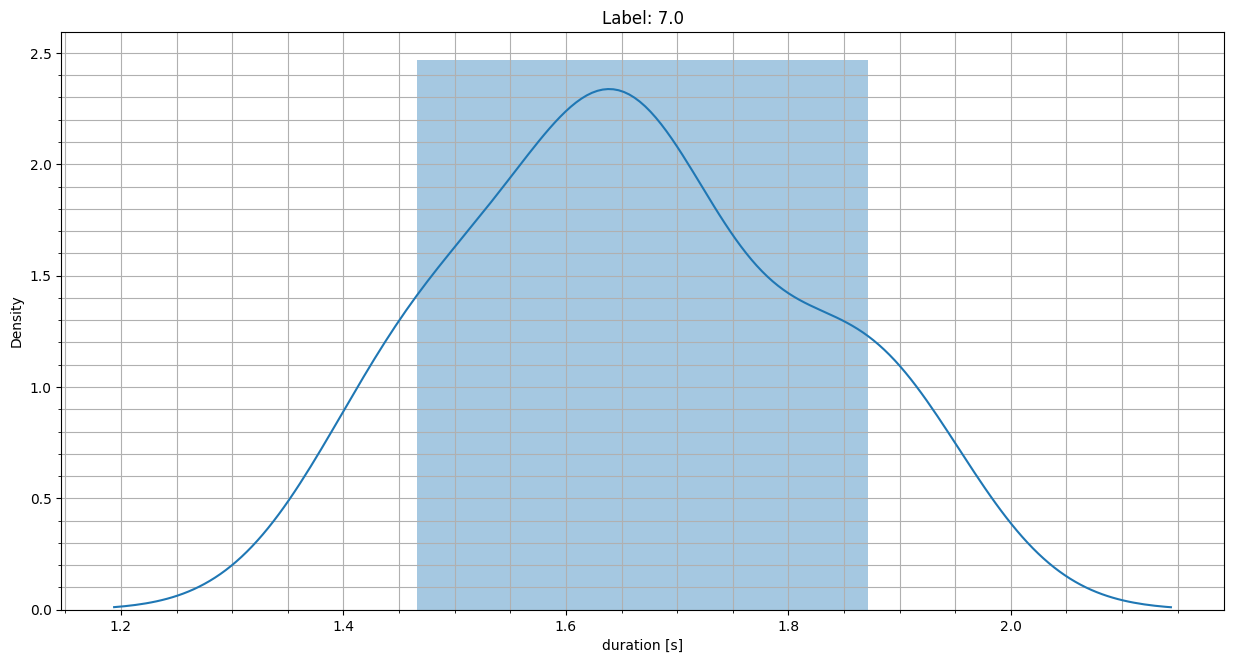

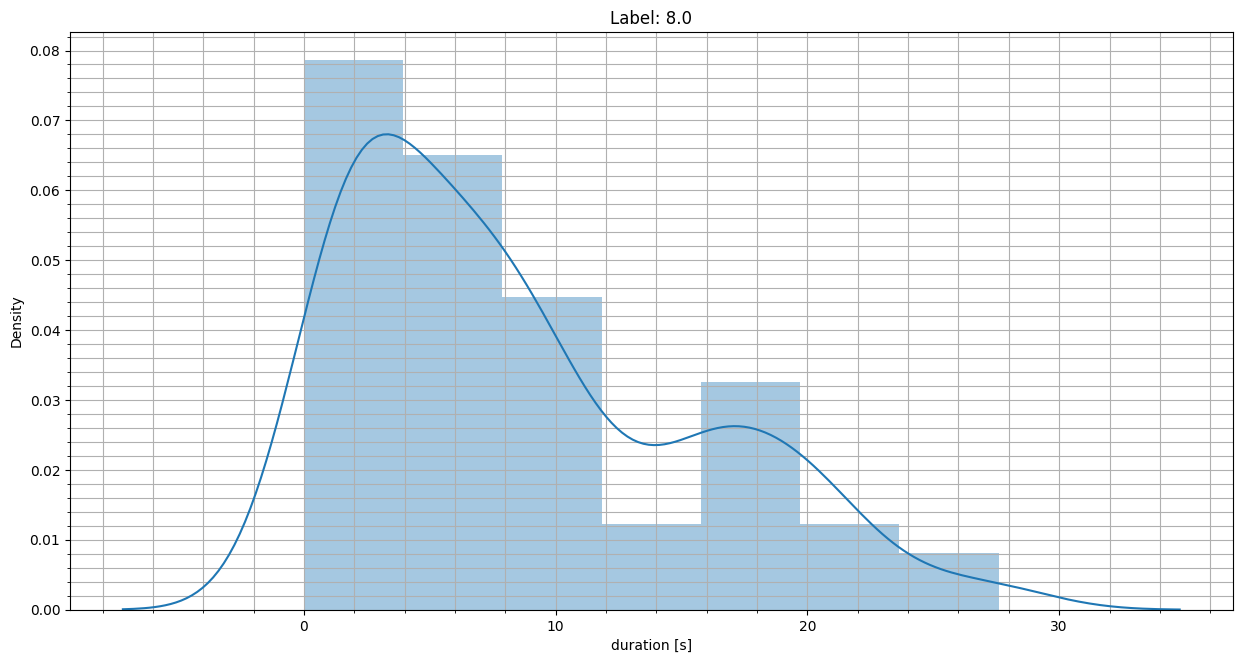

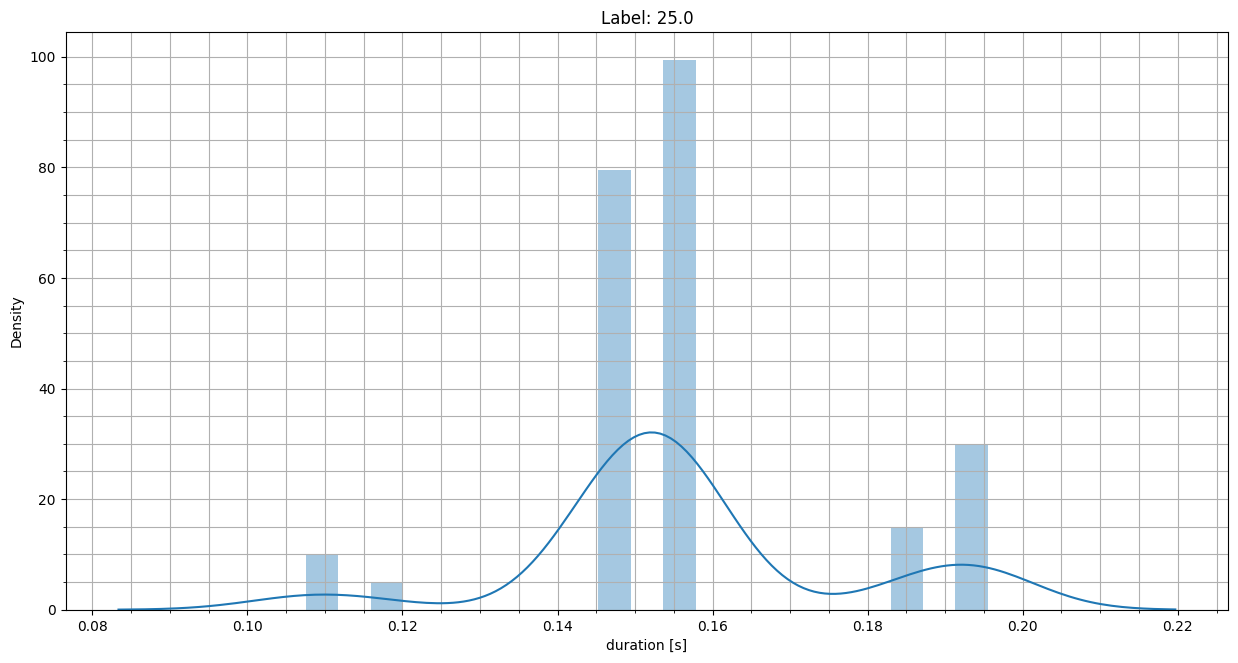

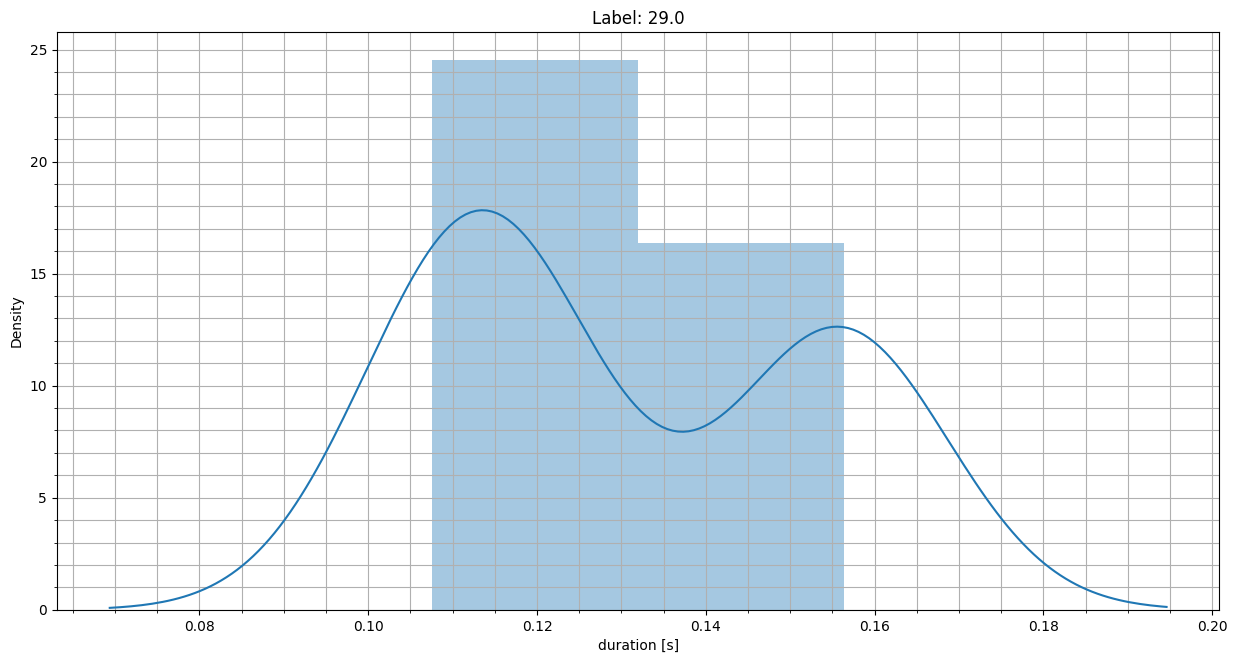

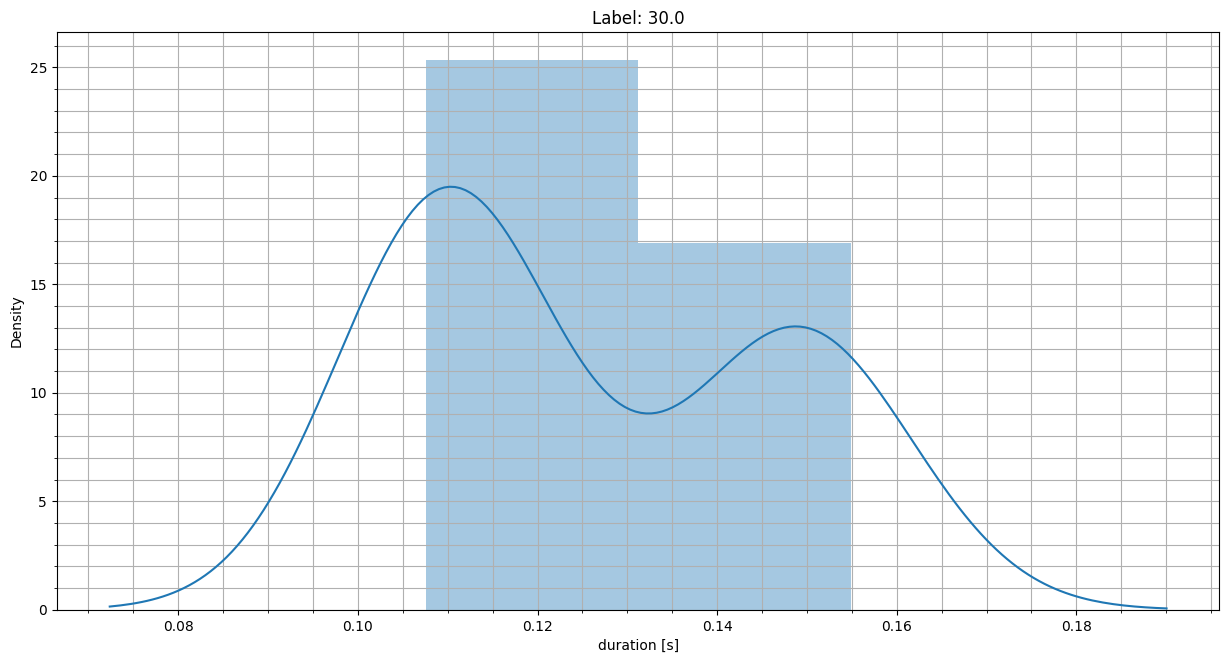

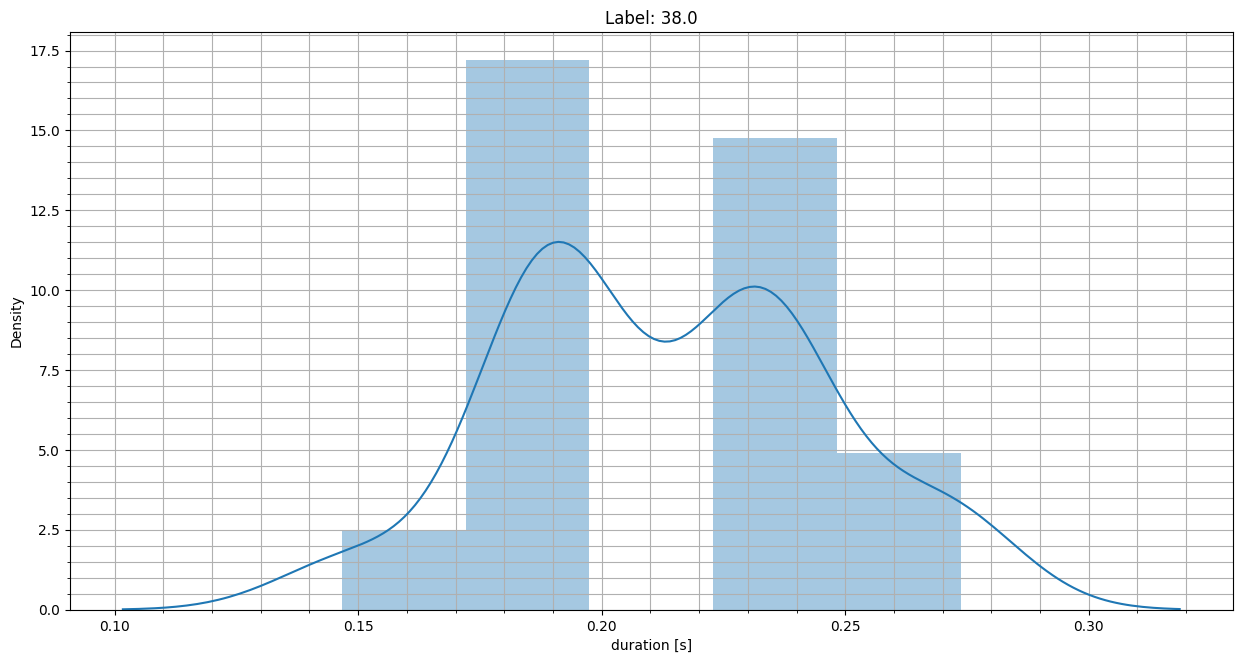

In [13]:
# Detailed single plots
table = []
print("\n\nOverview:")
for y_uniq in np.unique(duration_df.loc[:, "y"]):
    duration_df_uniq = duration_df.loc[duration_df.loc[:, "y"] == y_uniq, "duration [s]"]
    plt.figure(figsize=(15, 7.5))
    sns.distplot(duration_df_uniq)
    plt.title(f"Label: {y_uniq}")
    plt.minorticks_on()
    plt.grid(True, which='both')
    table += [[y_uniq, duration_df_uniq.min(),
               duration_df_uniq.max(),
               duration_df_uniq.mean(),
               duration_df_uniq.median(),
               duration_df_uniq.std(),
               duration_df_uniq.quantile(q=0.9),
               duration_df_uniq.quantile(q=0.95)]]
print(tabulate.tabulate(table, headers=["Label", "Min", "Max", "Mean", "Median", "Std", "90% Percentile", "95% Percentile"]))
plt.show()